In [1]:
from pymna import Circuit
from pymna.units import kOhm,uF, V, Hz, um, kHz
from pymna.simulator import Simulator
import matplotlib.pyplot as plt
import os

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%matplotlib ipympl
%autoreload 2
basepath = os.getcwd()
print(basepath)

/Users/jodafons/Desktop/pymna/examples


In [267]:

circuit = Circuit()
circuit.SinusoidalVoltageSource('in', circuit.gnd, 
                                amplitude=1, 
                                frequency=10, 
                                number_of_cycles=10, 
                                dc=0,
                                angle=90,
                                name='Vsin')


circuit.Diode('in','out',name='D1')
circuit.R('out',circuit.gnd,1*kOhm, name='RL')
circuit.C('out',circuit.gnd, 1e-3)

simulator = Simulator()
r = simulator.transient( circuit , 0.5, 0.001)



Transient simulation started with end_time=0.5, step_time=0.001
max_number_of_internal_step=1, max_tolerance=0.0001
Max number of nodes: 2


IndexError: index 4 is out of bounds for axis 1 with size 4

In [175]:
r.keys()

dict_keys(['t', '1', '2', 'J3Vsin'])

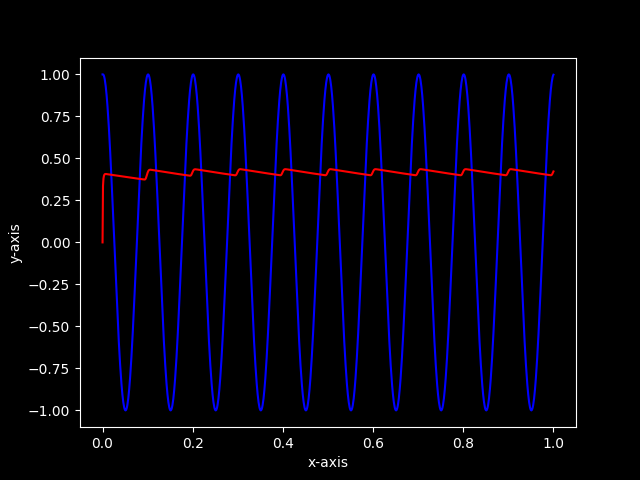

In [176]:
plt.style.use('dark_background')

fig, ax = plt.subplots()
plt.plot( r['t'], r['1'], color='blue' )
plt.plot( r['t'], r['2'], color='red' )

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("")

plt.show()

{0: 0, 'drain': 1, 'gate': 2, 'source': 3}
Transient simulation started with end_time=0.003, step_time=1e-05
max_number_of_internal_step=1, max_tolerance=0.0001
Max number of nodes: 3


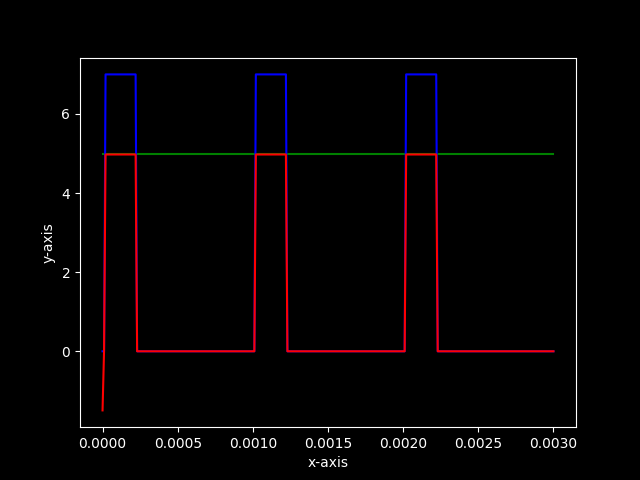

In [427]:

# signal input
fs = 1000*Hz
Ts = 1/fs
ns = 3
end_time = (Ts)*ns

# clock signal
#fclk = 2*fs
#Tclk = 1/fclk 
#nclk = end_time / (Tclk)



circuit = Circuit()

circuit.VoltageSource('drain',circuit.gnd, 5)
circuit.mosfet_channel_n('drain', 'gate', 'source' , W=5*um , L=5*um )
circuit.PulseVoltageSource( 'gate', circuit.gnd,
                                    amplitude_1 = 0,
                                    amplitude_2 = 7,
                                    T = Ts,
                                    number_of_cycles = ns,
                                    #rise_time=0.001,
                                    #fall_time=0.001,
                                    time_on = Ts*0.2)
circuit.R('source', circuit.gnd, 1000000)
#circuit.C('source', circuit.gnd, 1e-8)
print(circuit.nodes)
simulator = Simulator()
r = simulator.transient( circuit , end_time, 0.00001, verbose=False)
plt.style.use('dark_background')
fig, ax = plt.subplots()
plt.plot( r['t'], r['drain'] , color='green' )
plt.plot( r['t'], r['gate']  , color='blue' )
plt.plot( r['t'], r['source'], color='red' )
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("")
plt.show()


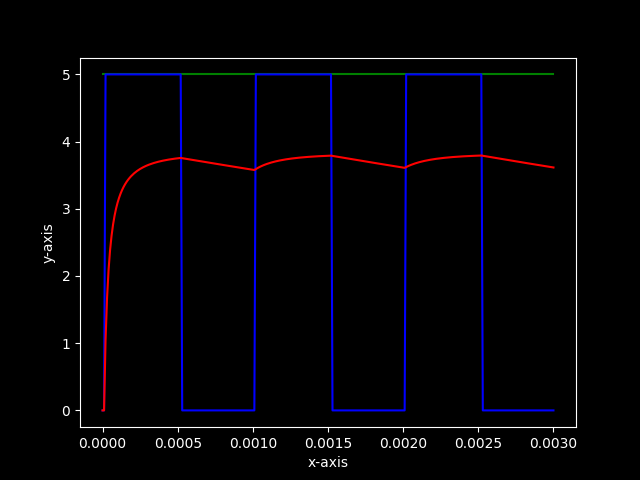

In [388]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
plt.plot( r['t'], r['drain'] , color='green' )
plt.plot( r['t'], r['gate']  , color='blue' )
plt.plot( r['t'], r['source'], color='red' )
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("")
plt.show()

{0: 0, 'in': 1, 'out1': 2, 'base': 3, 'in2': 4, 'out': 5}
Transient simulation started with end_time=0.002, step_time=1e-06
max_number_of_internal_step=1, max_tolerance=0.0001
Max number of nodes: 5


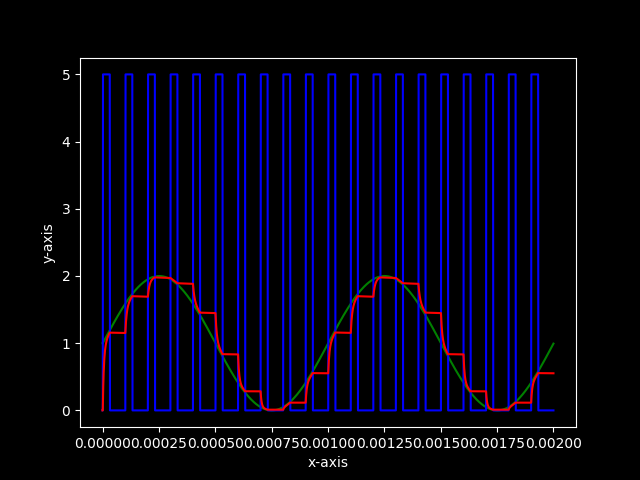

In [70]:
# signal input
Hz=1
fs = 1000*Hz
Ts = 1/fs
ns = 2
end_time = (Ts)*ns

# clock signal
fclk = 10*fs
Tclk = 1/fclk 
nclk = end_time / (Tclk)

circuit = Circuit()
circuit.SinusoidalVoltageSource('in', circuit.gnd, 
                                amplitude=1, 
                                frequency=fs, 
                                number_of_cycles=ns, 
                                dc=1,
                                name='Vsin')
circuit.OpAmp( 'in', 'out1', 'out1' )
circuit.mosfet_channel_n('out1', 'base', 'in2' , W=5*um , L=5*um )
circuit.PulseVoltageSource( 'base', circuit.gnd,
                                    amplitude_1 = 0,
                                    amplitude_2 = 5,
                                    T = Tclk,
                                    number_of_cycles = nclk,
                                    time_on = 0.3*Tclk)
circuit.C('in2', circuit.gnd, 3e-9 )
circuit.R('in2',circuit.gnd, 5000000)
#circuit.R('aux',circuit.gnd,5)
circuit.OpAmp( 'in2', 'out', 'out' )
circuit.R('out', circuit.gnd, 1000)
print(circuit.nodes)
simulator = Simulator()
r = simulator.transient( circuit , end_time, 0.000001, verbose=False)
plt.style.use('dark_background')
fig, ax = plt.subplots()
plt.plot( r['t'], r['in'] , color='green' )
plt.plot( r['t'], r['base'] , color='blue' )
plt.plot( r['t'], r['in2'], color='red' )
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("")
plt.show()

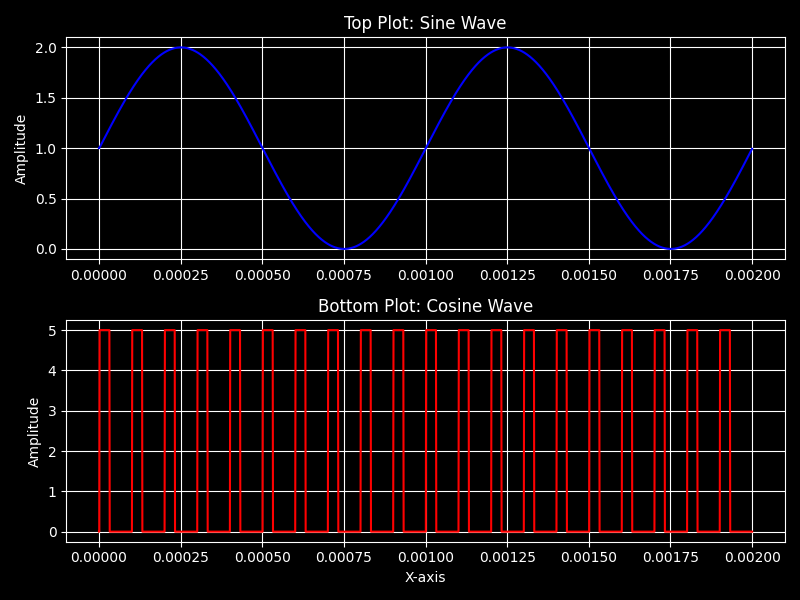

In [72]:
# Create a figure and a 2x1 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6)) # figsize for better visualization
x = r['t']
y1=r['in']
y2=r['base']
# Plot on the top subplot (ax[0])
ax[0].plot(x, y1, color='blue')
ax[0].set_title('Top Plot: Sine Wave')
ax[0].set_ylabel('Amplitude')
ax[0].grid(True)

# Plot on the bottom subplot (ax[1])
ax[1].plot(x, y2, color='red')
ax[1].set_title('Bottom Plot: Cosine Wave')
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Amplitude')
ax[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()